<a href="https://colab.research.google.com/github/Bhavana123448/NLP1/blob/main/2403A54069_Lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
!{sys.executable} -m pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 25.0 MB/s eta 0:00:00


In [2]:
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
# Load Google News Word2Vec model (300 dimensions)
model = api.load("word2vec-google-news-300")

print("Model Loaded Successfully!\n")

# Vocabulary size
print("Vocabulary Size:", len(model.key_to_index))

# Example word vector
print("\nVector for word 'king':\n")
print(model["king"])

print("\nVector Dimension:", len(model["king"]))

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model Loaded Successfully!

Vocabulary Size: 3000000

Vector for word 'king':

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58

In [4]:
print("\n----- Word Similarity -----\n")

word_pairs = [
    ("doctor", "nurse"),
    ("cat", "dog"),
    ("car", "bus"),
    ("king", "queen"),
    ("apple", "banana"),
    ("teacher", "student"),
    ("city", "village"),
    ("india", "china"),
    ("sun", "moon"),
    ("computer", "laptop")
]

for w1, w2 in word_pairs:
    similarity = model.similarity(w1, w2)
    print(f"{w1} - {w2} : {similarity:.4f}")



----- Word Similarity -----

doctor - nurse : 0.6320
cat - dog : 0.7609
car - bus : 0.4693
king - queen : 0.6511
apple - banana : 0.5318
teacher - student : 0.6301
city - village : 0.4790
india - china : 0.3533
sun - moon : 0.4263
computer - laptop : 0.6640


In [5]:
print("\n----- Nearest Neighbors -----\n")

words_to_check = ["king", "university", "hospital", "car", "music"]

for word in words_to_check:
    print(f"\nTop 5 words similar to '{word}':")
    for similar_word, score in model.most_similar(word, topn=5):
        print(f"{similar_word} : {score:.4f}")



----- Nearest Neighbors -----


Top 5 words similar to 'king':
kings : 0.7138
queen : 0.6511
monarch : 0.6413
crown_prince : 0.6204
prince : 0.6160

Top 5 words similar to 'university':
universities : 0.7004
faculty : 0.6781
unversity : 0.6758
undergraduate : 0.6587
univeristy : 0.6585

Top 5 words similar to 'hospital':
Hospital : 0.7932
hopsital : 0.7784
hosptial : 0.7582
hospitals : 0.7213
intensive_care : 0.7206

Top 5 words similar to 'car':
vehicle : 0.7821
cars : 0.7424
SUV : 0.7161
minivan : 0.6907
truck : 0.6736

Top 5 words similar to 'music':
classical_music : 0.7198
jazz : 0.6835
Music : 0.6596
Without_Donny_Kirshner : 0.6416
songs : 0.6396


In [7]:
print("\n----- Word Analogies -----\n")

# king - man + woman
result1 = model.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
print("king - man + woman =", result1)

# paris - france + india
result2 = model.most_similar(positive=["paris", "india"], negative=["france"], topn=1)
print("paris - france + india =", result2)

# teacher - school + hospital
result3 = model.most_similar(positive=["teacher", "hospital"], negative=["school"], topn=1)
print("teacher - school + hospital =", result3)



----- Word Analogies -----

king - man + woman = [('queen', 0.7118193507194519)]
paris - france + india = [('chennai', 0.5442505478858948)]
teacher - school + hospital = [('Hospital', 0.6331106424331665)]


In [8]:
vector_result = model['king'] - model['man'] + model['woman']
print(f"Vector result (king - man + woman): {vector_result[:5]}...") # Print first 5 elements for brevity

# To find the most similar word to this resultant vector, we can use model.similar_by_vector
similar_to_analogy = model.similar_by_vector(vector_result, topn=1)
print(f"Word most similar to (king - man + woman): {similar_to_analogy}")

Vector result (king - man + woman): [ 0.04296875 -0.17822266 -0.12908936  0.11523438  0.00268555]...
Word most similar to (king - man + woman): [('king', 0.8449392318725586)]



----- Visualization -----



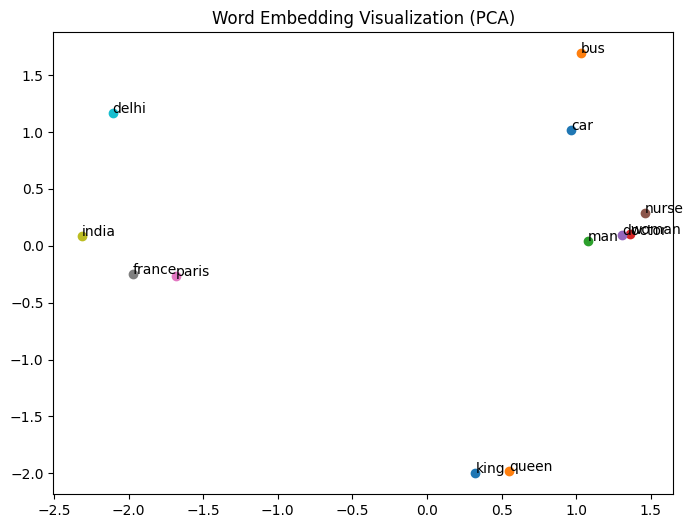

In [9]:
print("\n----- Visualization -----\n")

words = [
    "king", "queen", "man", "woman",
    "doctor", "nurse",
    "paris", "france",
    "india", "delhi",
    "car", "bus"
]

# Extract vectors
vectors = [model[word] for word in words]

# Reduce 300D → 2D
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(8,6))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word)

plt.title("Word Embedding Visualization (PCA)")
plt.show()

In [10]:
print("""
Reflection:
Word embeddings capture semantic relationships from context.
Similar words appear close in vector space.
Analogies work because embeddings encode relational patterns.
However, embeddings may fail for ambiguous words.
Bias in training data can influence results.
Overall, embeddings provide meaningful dense representations of words.
""")


Reflection:
Word embeddings capture semantic relationships from context.
Similar words appear close in vector space.
Analogies work because embeddings encode relational patterns.
However, embeddings may fail for ambiguous words.
Bias in training data can influence results.
Overall, embeddings provide meaningful dense representations of words.

